# Especialização em Ciência de Dados - PUC-Rio
# Machine Learning - Prof. Tatiana Escovedo
## Problemas de Classificação

# Nosso primeiro modelo de classificação simplificado

In [1]:
# Imports necessários
import pandas as pd
from sklearn.datasets import load_iris # para importar o dataset iris
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste
from sklearn.metrics import confusion_matrix # para a exibição da matriz de confusão do modelo
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.svm import SVC # para utilizar o algoritmo SVM

# Carga do dataset
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=iris.feature_names) # conversão para dataframe
dataset['target'] = iris.target # adição da coluna target

# Separação em bases de treino e teste
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Criação do modelo e predições
model = SVC(gamma='auto') # cria o modelo
model.fit(X_train, Y_train) # treina o modelo com o dataset de treino
predictions = model.predict(X_test) # faz as predições com o dataset de teste

# Avaliação das predições
print(accuracy_score(Y_test, predictions)) # acurácia
print(confusion_matrix(Y_test, predictions)) # matriz de confusão

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]


**Exercício:** procure no Scikit-Learn por outros modelos de classificação e substitua a linha: `model = SVC(gamma='auto')` por outra que crie outro modelo. Analise os resultados obtidos.

# Problemas de classificação passo a passo

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV # para o grid search
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline # para o pipeline

## Carga do dataset

In [3]:
# configuração para não exibir os warnings

# import warnings
# warnings.filterwarnings("ignore")

# ignorando future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Informa o cabeçalho das colunas
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=0, delimiter=',')

In [5]:
# Exibe as primeiras linhas
dataset.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Particionamento em conjuntos de treino e teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# separando os atributos e a classe do dataset
array = dataset.values
X = array[:,0:8]
Y = array[:,8]

# definindo o tamanho do conjunto de teste
test_size = 0.20 

# A semente (seed) pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
# Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
seed = 7

# particionando em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Modelos de Classificação

* Validação Cruzada: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* Métricas de avaliação: http://scikit-learn.org/stable/modules/model_evaluation.html

In [7]:
# definindo a métrica de avaliação dos algoritmos
scoring = 'accuracy'
# scoring = 'roc_auc'

num_particoes = 10 # número de folds da validação cruzada

kfold = KFold(n_splits=num_particoes)

### KNN

O algoritmo KNN usa uma métrica de distância para encontrar as k instâncias mais semelhantes nos dados de treinamento para uma nova instância e considera o resultado médio dos vizinhos como a previsão. Podemos construir um modelo KNN usando a classe KNeighborsClassifier.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [8]:
model = KNeighborsClassifier()
print(model.get_params) # imprime os parâmetros do modelo
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

<bound method BaseEstimator.get_params of KNeighborsClassifier()>
0.7101533580116342


Vamos agora experimentar variar alguns dos parâmetros do modelo.

In [9]:
# criação de outro modelo alterando o tipo de distância
model = KNeighborsClassifier(metric = 'manhattan')
print(model.get_params)
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

<bound method BaseEstimator.get_params of KNeighborsClassifier(metric='manhattan')>
0.7216552088841882


In [10]:
# criação de outro modelo alterando o valor de k
model = KNeighborsClassifier(n_neighbors = 7)
print(model.get_params)
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=7)>
0.718244315177155


### Árvore de Classificação

Os modelos de árvores de decisão constroem uma árvore binária a partir dos dados de treinamento. Os pontos de divisão são escolhidos através da avaliação dos dados de treinamento, com base na contribuição de cada atributo para minimizar uma função de custo (como, por exemplo, o índice Gini, usado para medir a probabilidade de dois itens aleatórios pertencerem à mesma classe). Para construir um modelo do tipo CART (Classification and Regression Trees), podemos usar a classe DecisionTreeClassifier.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**OBS:**
Quais são os vários algoritmos da árvore de decisão e como eles diferem um do outro? Qual é implementado no scikit-learn?

* ID3 (Iterative Dichotomiser 3) foi desenvolvido em 1986 por Ross Quinlan. O algoritmo cria uma árvore de múltiplas vias, encontrando para cada nó (isto é, de maneira gulosa) o recurso categórico que produzirá o maior ganho de informação para os alvos categóricos. As árvores crescem no tamanho máximo e, em seguida, geralmente é aplicada uma etapa de poda para melhorar a capacidade da árvore de generalizar para dados não vistos.

* C4.5 é o sucessor do ID3 e removeu a restrição de que os recursos devem ser categóricos, definindo dinamicamente um atributo discreto (com base em variáveis numéricas) que particiona o valor do atributo contínuo em um conjunto discreto de intervalos. C4.5 converte as árvores treinadas (ou seja, a saída do algoritmo ID3) em conjuntos de regras if-then. Essa precisão de cada regra é então avaliada para determinar a ordem em que elas devem ser aplicadas. A poda é feita removendo a pré-condição de uma regra se a precisão da regra melhorar sem ela.

* C5.0 é o lançamento de uma versão mais recente da C4.5 sob uma licença proprietária. Ele usa menos memória e cria conjuntos de regras menores que o C4.5, sendo mais preciso.

* CART (Classification and Regression Trees) é muito semelhante ao C4.5, mas difere no fato de suportar variáveis de saída numéricas (problemas de regressão) e não computar conjuntos de regras. O CART constrói árvores binárias usando os atributos que produzem o maior ganho de informação em cada nó.


O scikit-learn usa uma versão otimizada do algoritmo CART; no entanto, a implementação do scikit-learn não suporta variáveis categóricas por enquanto. Veja mais em: https://scikit-learn.org/stable/modules/tree.html

In [11]:
model = DecisionTreeClassifier(random_state=7)
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.6758593336858805


Também é possível especificar valores para os parâmetros da árvore de classificação:

In [12]:
# criando o modelo já com os parâmetros desejados
model = DecisionTreeClassifier(max_depth = 3, # profundidade máxima - inteiro ou "None" (sem limite). Valores muito altos podem causar overviffing e muito baixos, underfitting.
                             criterion = 'entropy', # critério de medição de qualidade de um particionamento {“gini”, “entropy”}, default=”gini”
                             random_state=7) # semente aleatória

# imprimindo os parâmetros do modelo
print(model.get_params)

results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)>
0.7426493918561607


### Naive Bayes 

O algoritmo Naive Bayes calcula a probabilidade de cada classe e a probabilidade condicional de cada classe, considerando cada valor de entrada. Essas probabilidades são estimadas para novos dados e multiplicadas juntas, assumindo que sejam todas independentes (uma suposição simples ou ingênua). Ao trabalhar com dados com valores reais, supõe-se que eles seguem uma distribuição Gaussiana. Podemos construir um modelo Naive Bayes usando a classe GaussianNB.

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [13]:
model = GaussianNB()
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.7508196721311474


### Support Vector Machines
O SVM busca uma linha que melhor separa duas classes. As instâncias de dados mais próximas desta linha são chamadas vetores de suporte e influenciam onde a linha é colocada. O SVM foi estendido para suportar várias classes e é possível utilizar diferentes funções kernel. Por padrão, é usada e função de base radial. Vamos construir um modelo SVM usando a classe SVC.

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

http://scikit-learn.org/stable/modules/svm.html

In [14]:
model = SVC()
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.7572712850343732


In [15]:
model = SVC(kernel = 'linear')
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.7768376520359598


## Comparando o desempenho dos modelos

KNN: 0.710153 (0.064599)
CART: 0.687335 (0.052398)
NB: 0.750820 (0.050575)
SVM: 0.757271 (0.047915)
LR: 0.773559 (0.060644)


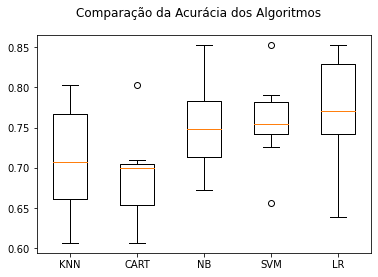

In [16]:
# https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/
np.random.seed(7) # definindo uma seed global

# preparando os modelos
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression(max_iter=200)))

# avaliando um modelo por vez
results = []
names = []
scoring = 'accuracy'
folds = 10

for name, model in models:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)

# boxplot de comparação dos algoritmos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Algoritmos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

## Comparando o desempenho dos modelos com Pipelines - Dados Padronizados e Normalizados

Para evitar o *data leakage* quando usamos validação cruzada, precisamos garantir que o método de preparação de dados seja preparado no conjunto de treinamento e aplicado nos conjuntos de treino e teste dentro do procedimento de validação cruzada, ou seja, a cada combinação de *folds*. Para tal, podemos definir um *pipeline*, um objeto que define uma sequência de etapas de preparação de dados em cadeia, e que finaliza com um estimador (modelo) a ser treinado e avaliado.

*   Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html



ScaledKNN: 0.718297 (0.071563)
ScaledCART: 0.684082 (0.052059)
ScaledNB: 0.750820 (0.050575)
ScaledSVM: 0.752565 (0.064295)
ScaledLR: 0.778424 (0.061895)


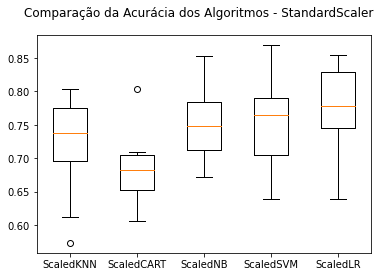

In [17]:
np.random.seed(7) # definindo uma seed global

# pipeline simples
#steps = list()
#steps.append(('scaler', MinMaxScaler()))
#steps.append(('model', LogisticRegression()))
#pipeline = Pipeline(steps=steps)

# Pipelines para padronização do dataset e aplicação do modelo
pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))

results = []
names = []

# Aplicação dos pipelines
for name, model in pipelines:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot de comparação dos algoritmos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Algoritmos - StandardScaler') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

NormKNN: 0.718271 (0.072688)
NormCART: 0.685722 (0.052430)
NormNB: 0.750820 (0.050575)
NormSVM: 0.747594 (0.071499)
NormLR: 0.765362 (0.066363)


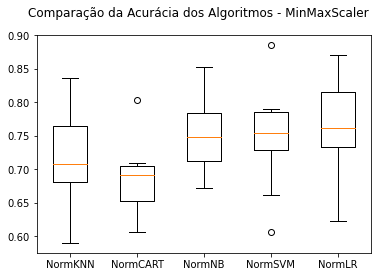

In [18]:
np.random.seed(7) # definindo uma seed global

# Pipelines para madronização do dataset e aplicação do modelo
pipelines = []
pipelines.append(('NormKNN', Pipeline([('MinMaxScaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('NormCART', Pipeline([('MinMaxScaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NormNB', Pipeline([('MinMaxScaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('NormSVM', Pipeline([('MinMaxScaler', MinMaxScaler()),('SVM', SVC())])))
pipelines.append(('NormLR', Pipeline([('MinMaxScaler', MinMaxScaler()),('LR', LogisticRegression())])))


results = []
names = []

# Aplicação dos pipelines
for name, model in pipelines:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot de comparação dos algoritmos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Algoritmos - MinMaxScaler') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

## Otimizando os Hiperparâmetros com GridSearch

* GridSearch: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
# padronização dos dados
scaler = StandardScaler().fit(X_train) # ajuste da transformação
rescaledX = scaler.transform(X_train) # aplicação da transformação

In [20]:
# Tuning do KNN

# hiperparâmetros que serão avaliados
k = [1,3,5,7,9,11,13,15,17,19,21]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric=distancias)

# modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.747329 usando {'metric': 'manhattan', 'n_neighbors': 17}
0.702036 (0.075358): {'metric': 'euclidean', 'n_neighbors': 1}
0.734611 (0.068286): {'metric': 'euclidean', 'n_neighbors': 3}
0.713432 (0.067707): {'metric': 'euclidean', 'n_neighbors': 5}
0.731253 (0.069739): {'metric': 'euclidean', 'n_neighbors': 7}
0.734506 (0.069032): {'metric': 'euclidean', 'n_neighbors': 9}
0.737652 (0.067802): {'metric': 'euclidean', 'n_neighbors': 11}
0.734400 (0.074541): {'metric': 'euclidean', 'n_neighbors': 13}
0.729376 (0.084487): {'metric': 'euclidean', 'n_neighbors': 15}
0.729455 (0.067497): {'metric': 'euclidean', 'n_neighbors': 17}
0.726150 (0.072579): {'metric': 'euclidean', 'n_neighbors': 19}
0.724484 (0.071632): {'metric': 'euclidean', 'n_neighbors': 21}
0.677578 (0.052071): {'metric': 'manhattan', 'n_neighbors': 1}
0.693866 (0.060109): {'metric': 'manhattan', 'n_neighbors': 3}
0.708408 (0.064635): {'metric': 'manhattan', 'n_neighbors': 5}
0.726362 (0.066480): {'metric': 'manhattan', 

In [21]:
# Tuning do SVM

# hiperparâmetros que serão avaliados
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.780090 usando {'C': 0.1, 'kernel': 'linear'}
0.780090 (0.055426): {'C': 0.1, 'kernel': 'linear'}
0.711608 (0.066320): {'C': 0.1, 'kernel': 'poly'}
0.711713 (0.047940): {'C': 0.1, 'kernel': 'rbf'}
0.765362 (0.059384): {'C': 0.1, 'kernel': 'sigmoid'}
0.780063 (0.060190): {'C': 0.3, 'kernel': 'linear'}
0.731280 (0.054733): {'C': 0.3, 'kernel': 'poly'}
0.754045 (0.067017): {'C': 0.3, 'kernel': 'rbf'}
0.750714 (0.060719): {'C': 0.3, 'kernel': 'sigmoid'}
0.778451 (0.061394): {'C': 0.5, 'kernel': 'linear'}
0.736118 (0.072612): {'C': 0.5, 'kernel': 'poly'}
0.754098 (0.069671): {'C': 0.5, 'kernel': 'rbf'}
0.762110 (0.042649): {'C': 0.5, 'kernel': 'sigmoid'}
0.778451 (0.061394): {'C': 0.7, 'kernel': 'linear'}
0.739397 (0.063104): {'C': 0.7, 'kernel': 'poly'}
0.745955 (0.060212): {'C': 0.7, 'kernel': 'rbf'}
0.747462 (0.050255): {'C': 0.7, 'kernel': 'sigmoid'}
0.778451 (0.061394): {'C': 0.9, 'kernel': 'linear'}
0.737811 (0.060544): {'C': 0.9, 'kernel': 'poly'}
0.749260 (0.064707): {'C': 

Podemos ver que a configuração que alcançou a maior acurácia foi o modelo que utilizou kernel linear e C = 0,1. Esta acurácia é a mais alta que conseguimos até o momento.

## Fazendo as predições

In [22]:
np.random.seed(7) # definindo uma seed global 

# padronização os dados de treino
scaler = StandardScaler().fit(X_train) # ajuste da transformação com os dados de treino
rescaledX = scaler.transform(X_train) # aplicação da transformação nos dados de treino

# criando um modelo com a melhor configuração até o momento
model = SVC(C=0.1, kernel='linear')
model.fit(rescaledX, Y_train)

# padronização dos dados de teste
rescaledTestX = scaler.transform(X_test) # aplicação da transformação nos dados de teste

# predição
predictions = model.predict(rescaledTestX)

# estimando a acurácia no conjunto de teste
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.7922077922077922
[[91  6]
 [26 31]]
              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85        97
         1.0       0.84      0.54      0.66        57

    accuracy                           0.79       154
   macro avg       0.81      0.74      0.76       154
weighted avg       0.80      0.79      0.78       154



In [23]:
print(Y_test)

[0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]


In [24]:
print(predictions)

[0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
